# Exploratory Data Analysis (EDA)

EDA is all about understanding your data by employing summarizing and visualizing techniques. At a high level the EDA can be performed in two folds, that is, **univariate analysis** and **multivariate analysis**.

## Univariate Analysis
Individual variables are analyzed in isolation to have a better understanding about them. Pandas provide the describe function to create summary statistics in tabular format for all variables. These statistics are very useful for numerical types of variables to understand any quality issues such as missing values and the presence of outliers. 

In [1]:
# Univariate analysis
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.
species==1.0,'versicolor', 'virginica'))
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The columns ‘species’ is categorical, so lets check the frequency distribution for each category.

In [2]:
print (iris['species'].value_counts())

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


pandas supports plotting functions to quick visualization on attributes. We can see from the plot that 'species' has 3 category with 50 records each.

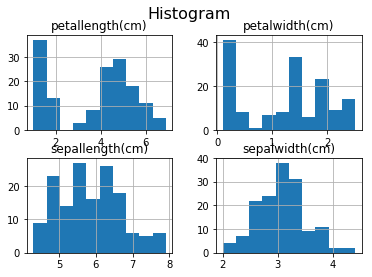

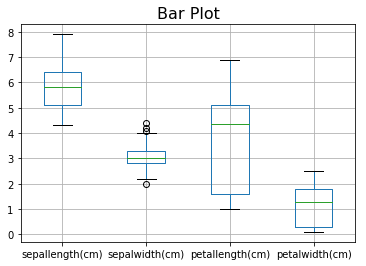

In [12]:
# Pandas dataframe visualization
# Set the size of the plot
from matplotlib import pyplot as plt
iris.hist()                            # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots
plt.show()
iris.boxplot()     # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

## Multivariate Analysis
In multivariate analysis you try to establish a sense of relationship of all variables with one other. <br>
**Let’s understand the mean of each feature by species type. **


In [16]:
# Multivariate analysis
# print the mean for each column by species
print (iris.groupby(by = "species").mean())

            sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)
species                                                                     
setosa                5.006           3.418            1.464           0.244
versicolor            5.936           2.770            4.260           1.326
virginica             6.588           2.974            5.552           2.026


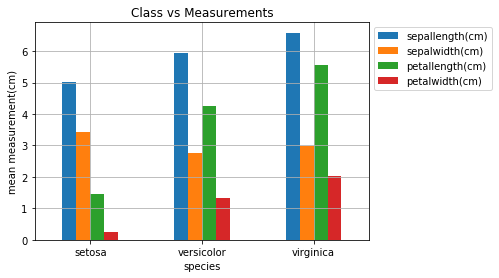

In [18]:
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Correlation Matrix
The correlation function uses Pearson correlation coefficient, which results in a number  between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1 and a strong positive correlation is indicated by a coefficient toward 1. 

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.109369         0.871754   
sepalwidth(cm)         -0.109369        1.000000        -0.420516   
petallength(cm)         0.871754       -0.420516         1.000000   
petalwidth(cm)          0.817954       -0.356544         0.962757   

                 petalwidth(cm)  
sepallength(cm)        0.817954  
sepalwidth(cm)        -0.356544  
petallength(cm)        0.962757  
petalwidth(cm)         1.000000  


/home/sara/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


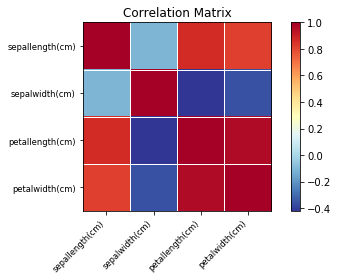

In [19]:
# create Correlation Matrix
corr = iris.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Pair Plot
You can understand the relationship attributes by looking at the distribution of the interactions of each pair of attributes. This uses a built-in function to create a matrix of scatter plots of all attributes against all attributes.

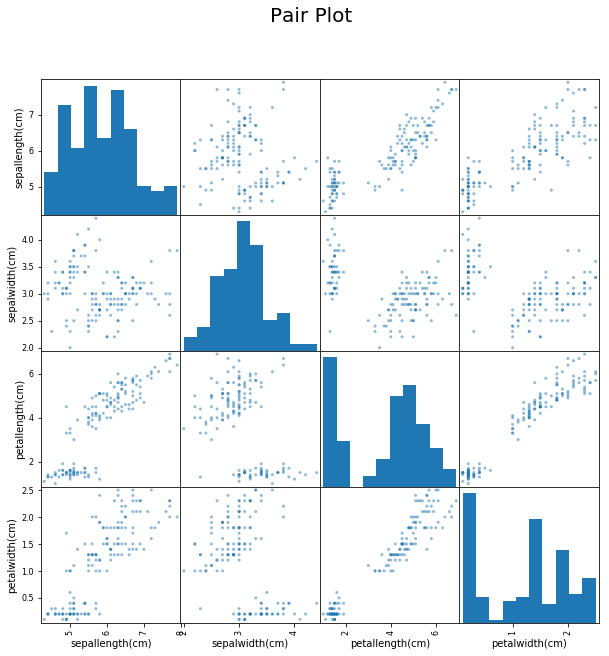

In [24]:
# Pair plot
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)
plt.show()